In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import copy
import math

In [2]:
# Loading data of house price from text file 
def load_house_data():
    data = np.loadtxt("houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

In [3]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [4]:
print(len(X_train), len(y_train))
print(X_features, "Age")
print(X_train[0], y_train[0])

99 99
['size(sqft)', 'bedrooms', 'floors', 'age'] Age
[1.244e+03 3.000e+00 1.000e+00 6.400e+01] 300.0


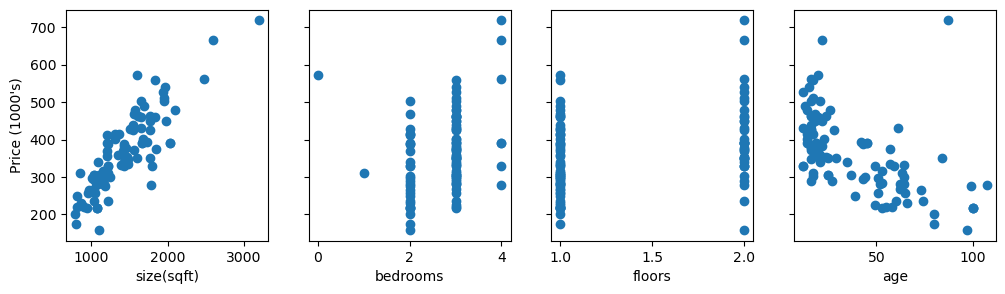

In [5]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

Plotting each feature vs. the target, price, provides some indication of which features have the strongest influence on price. Above, increasing size also increases price. Bedrooms and floors don't seem to have a strong impact on price. Newer houses have higher prices than older houses.

### Hypothesis
- Multiple features

In [6]:
def hypothesis(W, w, b): 
    r = np.dot(W, w) + b
    return r 

### Computing Cost

The cost is:
  $$J(\mathbf{w}) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)})^2$$ 
 
where 
  $$f_{\mathbf{w}}(\mathbf{x}^{(i)}) = w_0x_0^{(i)} + w_1x_1^{(i)} \tag{1}$$
  
- $f_{\mathbf{w}}(\mathbf{x}^{(i)})$ is our prediction for example $i$ using our parameters $\mathbf{w}$.  
- $(f_{\mathbf{w}}(\mathbf{x}^{(i)}) -y^{(i)})^2$ is the squared difference between the actual value and our prediction.   
- These differences are summed over all the $m$ examples and averaged to produce the cost, $J(\mathbf{w})$.  
Note, in lecture summation ranges are typically from 1 to m while in code, we will run 0 to m-1.

In [7]:
def cost_function(X, y, w, b): 
    cost = 0.0
    n = X.shape[0]
    for i in range(n): 
        h = hypothesis(X[i],w, b)
        cost = cost + (h - y[i])**2
    cost = cost / (2*n) 
    return (np.square(cost)) 

    # m = X.shape[0]
    # cost = 0.0
    # for i in range(m):                                
    #     f_wb_i = np.dot(X[i],w) + b       
    #     cost = cost + (f_wb_i - y[i])**2              
    # cost = cost/(2*m)                                 
    # return(np.squeeze(cost))


<a name="toc_15456_5"></a>
## Gradient Descent With Multiple Variables
Here are the equations you developed in the last lab on gradient descent for multiple variables.:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j = 0..n-1}\newline
&b\ \ := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [8]:
def gradient_function(X, y, w, b): 
    n = X.shape[0]
    dj_db = 0.0
    dj_dw = 0.0
    for i in range(n): 
        h = hypothesis(X[i], w, b)
        dj_dw = dj_dw + (h - y[i]) * X[i]
        dj_db = dj_db + (h - y[i])
    dj_dw = dj_dw / n
    dj_db = dj_db / n
    return dj_db, dj_dw

In [15]:
def finding_gredient(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    m = len(X)
    
    # An array to store values at each iteration primarily for graphing later
    hist={}
    hist["cost"] = []; hist["params"] = []; hist["grads"]=[]; hist["iter"]=[];
    
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    save_interval = np.ceil(num_iters/10000) # prevent resource exhaustion for long runs

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J,w,b at each save interval for graphing
        if i == 0 or i % save_interval == 0:     
            hist["cost"].append(cost_function(X, y, w, b))
            hist["params"].append([w,b])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = cost_function(X, y, w, b)
            print(f"Iteration {i:9d}, Cost: {cst:0.5e}")
    return w, b, hist #return w,b and history for graphing
        

In [12]:
def run_gradient_descent(X,y,iterations=1000, alpha = 1e-6):

    m,n = X.shape
    # initialize parameters
    initial_w = np.zeros(n)
    initial_b = 0
    # run gradient descent
    w_out, b_out, hist_out = finding_gredient(X ,y, initial_w, initial_b,
                                               cost_function,gradient_function, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.2f}")
    
    return(w_out, b_out, hist_out)

In [21]:
def plot_cost_i_w(X,y,hist):
    ws = np.array([ p[0] for p in hist["params"]])
    rng = max(abs(ws[:,0].min()),abs(ws[:,0].max()))
    wr = np.linspace(-rng+0.27,rng+0.27,20)
    cst = [cost_function(X,y,np.array([wr[i],-32, -67, -1.46]), 221) for i in range(len(wr))]
    fig,ax = plt.subplots(1,2,figsize=(12,3))
    ax[0].plot(hist["iter"], (hist["cost"]));  ax[0].set_title("Cost vs Iteration")
    ax[0].set_xlabel("iteration"); ax[0].set_ylabel("Cost")
    ax[1].plot(wr, cst); ax[1].set_title("Cost vs w[0]")
    ax[1].set_xlabel("w[0]"); ax[1].set_ylabel("Cost")
    ax[1].plot(ws[:,0],hist["cost"])
    plt.show()

# Test model with different alpha

In [22]:
alpha = 9.9e-7
iterations=10
_,_,hist = run_gradient_descent(X_train, y_train, iterations, alpha)

print(hist)

Iteration         0, Cost: 9.13714e+09
Iteration         1, Cost: 1.64385e+10
Iteration         2, Cost: 2.96389e+10
Iteration         3, Cost: 5.35263e+10
Iteration         4, Cost: 9.67833e+10
Iteration         5, Cost: 1.75156e+11
Iteration         6, Cost: 3.17208e+11
Iteration         7, Cost: 5.74750e+11
Iteration         8, Cost: 1.04178e+12
Iteration         9, Cost: 1.88883e+12
w,b found by gradient descent: w: [-0.86831498 -0.00165867 -0.0009115  -0.02720726], b: -0.00
{'cost': [9137142158.656864, 16438525671.895296, 29638872633.623043, 53526322279.32912, 96783274054.19246, 175156345744.59576, 317207640347.8041, 574749616447.4949, 1041778141223.0374, 1888825256031.7214], 'params': [[array([5.46265788e-01, 9.95942280e-04, 5.13326620e-04, 1.22787176e-02]), 0.00035952452], [array([-0.08770797, -0.00017404, -0.00010024, -0.00340943]), -4.848224602614789e-05], [array([6.48129707e-01, 1.16980959e-03, 5.94094085e-04, 1.33626697e-02]), 0.0004343311422910404], [array([-0.20586534, -0.

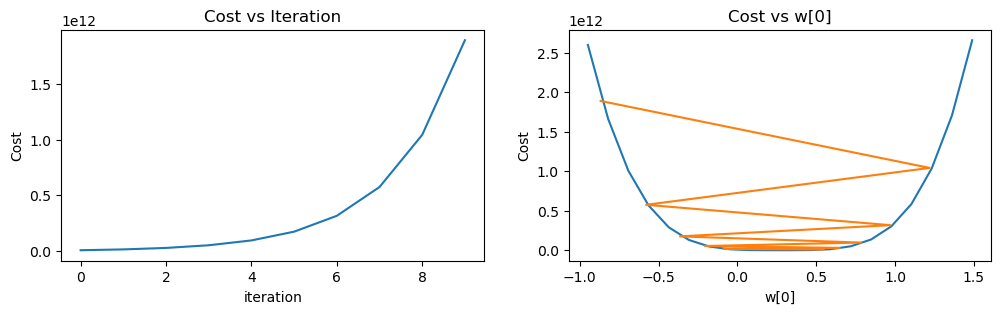

In [23]:
plot_cost_i_w(X_train, y_train, hist)

# 9e-7 

In [24]:
alpha = 9e-7
# 9e−7=9×0.0000001=0.0000009
iterations=10
_,_,hist = run_gradient_descent(X_train, y_train, iterations, alpha)

print(hist)

Iteration         0, Cost: 4.41714e+09
Iteration         1, Cost: 3.83149e+09
Iteration         2, Cost: 3.32435e+09
Iteration         3, Cost: 2.88516e+09
Iteration         4, Cost: 2.50474e+09
Iteration         5, Cost: 2.17518e+09
Iteration         6, Cost: 1.88964e+09
Iteration         7, Cost: 1.64219e+09
Iteration         8, Cost: 1.42770e+09
Iteration         9, Cost: 1.24176e+09
w,b found by gradient descent: w: [ 7.73775314e-02  8.27287625e-05 -1.06291972e-06 -4.19710549e-03], b: 0.00
{'cost': [4417142088.556403, 3831486180.359708, 3324353763.530675, 2885156701.446186, 2504738839.003647, 2175182032.3859396, 1889638474.7005253, 1642185751.1338873, 1427701541.0545132, 1241755302.6538844], 'params': [[array([4.96605262e-01, 9.05402073e-04, 4.66660564e-04, 1.11624705e-02]), 0.0003268404727272727], [array([ 1.78059389e-02,  2.07846239e-05,  2.00655726e-06, -7.88170014e-04]), 1.9357568573431566e-05], [array([4.79493079e-01, 8.62115811e-04, 4.35328826e-04, 9.54786063e-03]), 0.0003234

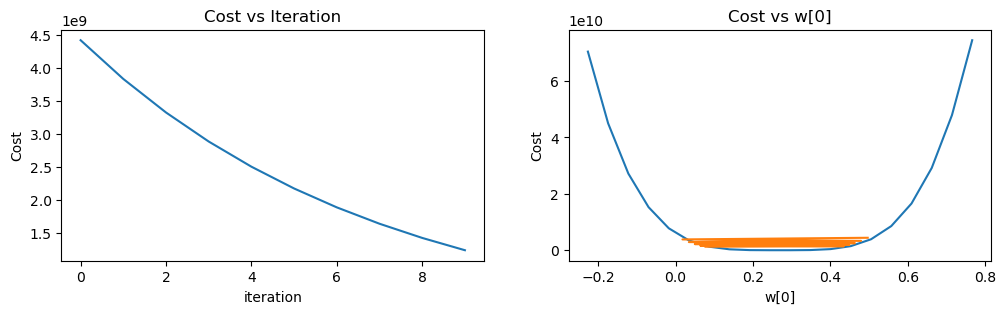

In [25]:
plot_cost_i_w(X_train, y_train, hist)

# Normalization x_train 
- x_normilization
- find the mean of each column/feature np.mean(X, axis=0) 
- find the standard deviation of each column/feature, np.std(X, axis=0)     
- subtract mu for that column from each example, divide by std for that column X_norm = (X - mu) / sigma      


In [27]:
def z_score_normalization(X_train): 
    mu = np.mean(X_train, axis=0)
    sigma = np.std(X_train, axis=0)
    X_mean = (X_train - mu)
    X_norm = (X_train - mu) / sigma
    return (X_norm, mu, sigma, X_mean)

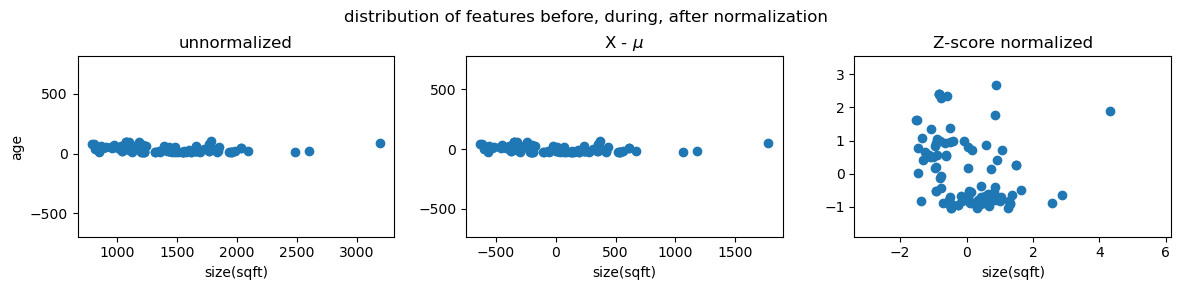

In [28]:
X_norm, mu, sigma, X_mean = z_score_normalization(X_train)
fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

Result of relationship between "age" and "size(sqft)". 
- Left: Unnormalized: feature is much larger than that of age
- Middle: The first step removes the mean or average value from each feature. This leaves features that are centered around zero. It's difficult to see the difference for the 'age' feature, but 'size(sqft)' is clearly around zero.
- Right: The second step divides by the standard deviation. This leaves both features centered at zero with a similar scale.

In [29]:
# normalize the original features
X_norm, X_mu, X_sigma,X_mean  = z_score_normalization(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.41837374e+03 2.71717172e+00 1.38383838e+00 3.83838384e+01], 
X_sigma = [411.61562893   0.65196523   0.48631932  25.77788069]
Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.8452591  6.13529646 2.05626214 3.68533012]


In [30]:
w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 1.0e-1,)

Iteration         0, Cost: 3.31972e+09
Iteration       100, Cost: 4.88789e+04
Iteration       200, Cost: 4.80525e+04
Iteration       300, Cost: 4.80516e+04
Iteration       400, Cost: 4.80516e+04
Iteration       500, Cost: 4.80516e+04
Iteration       600, Cost: 4.80516e+04
Iteration       700, Cost: 4.80516e+04
Iteration       800, Cost: 4.80516e+04
Iteration       900, Cost: 4.80516e+04
w,b found by gradient descent: w: [110.56039756 -21.26715096 -32.70718139 -37.97015909], b: 363.16


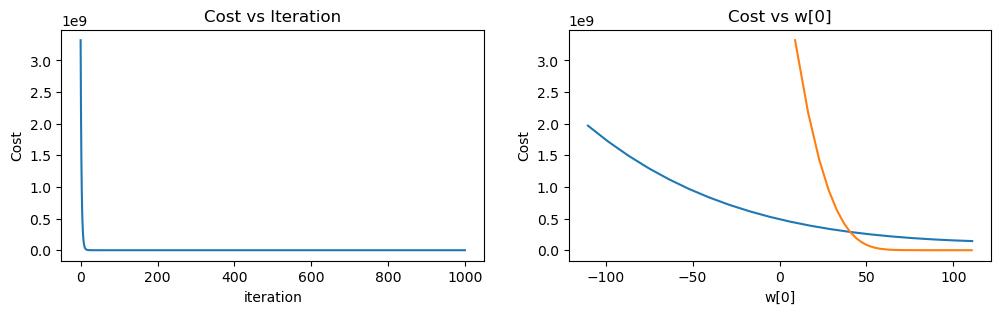

In [31]:
plot_cost_i_w(X_norm, y_train, hist)

The peak to peak range of each column is reduced from a factor of thousands to a factor of 2-3 by normalization.

In [37]:
# First, normalize out example.
x_house = np.array([1200, 3, 5, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[-0.53052829  0.43380884 -0.78927234 -1.45022932]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $376155
